##USA HOUSING DATA

###The data contains the following columns:

- 'Avg. Area Income': Avg. The income of residents of the city house is located in.
- 'Avg. Area House Age': Avg Age of Houses in the same city
- 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in the same city
- 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in the same city
- 'Area Population': The population of city house is located in
- 'Price': Price that the house sold at
- 'Address': Address for the house

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:


# Load the dataset
file_path = '/content/drive/MyDrive/0.Latest_DS_Course/SL/LinearRegression/Data/USA_Housing.csv'
df = pd.read_csv(file_path)

In [4]:


# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.shape

(5000, 7)

In [6]:


# EDA: Summary statistics
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:

# EDA: Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


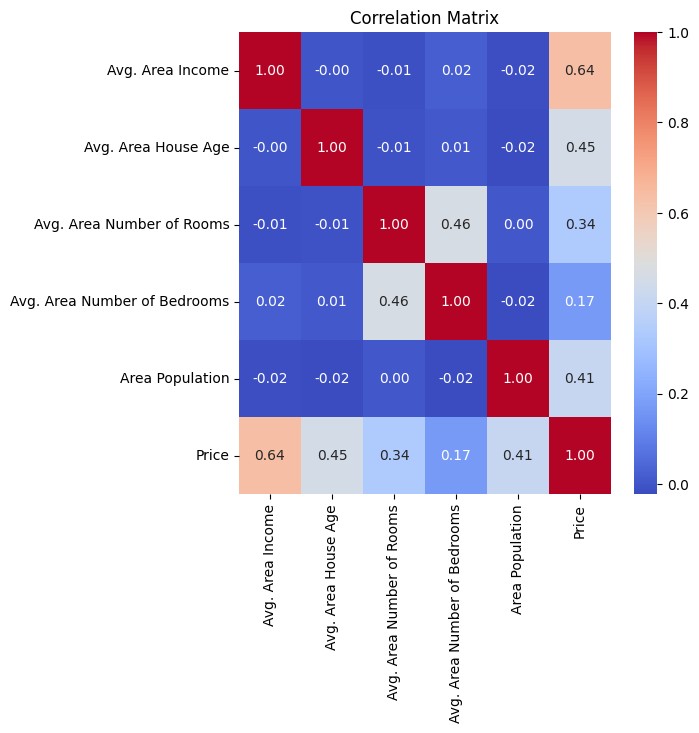

In [8]:
# EDA: Correlation matrix
plt.figure(figsize=(6, 6))
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

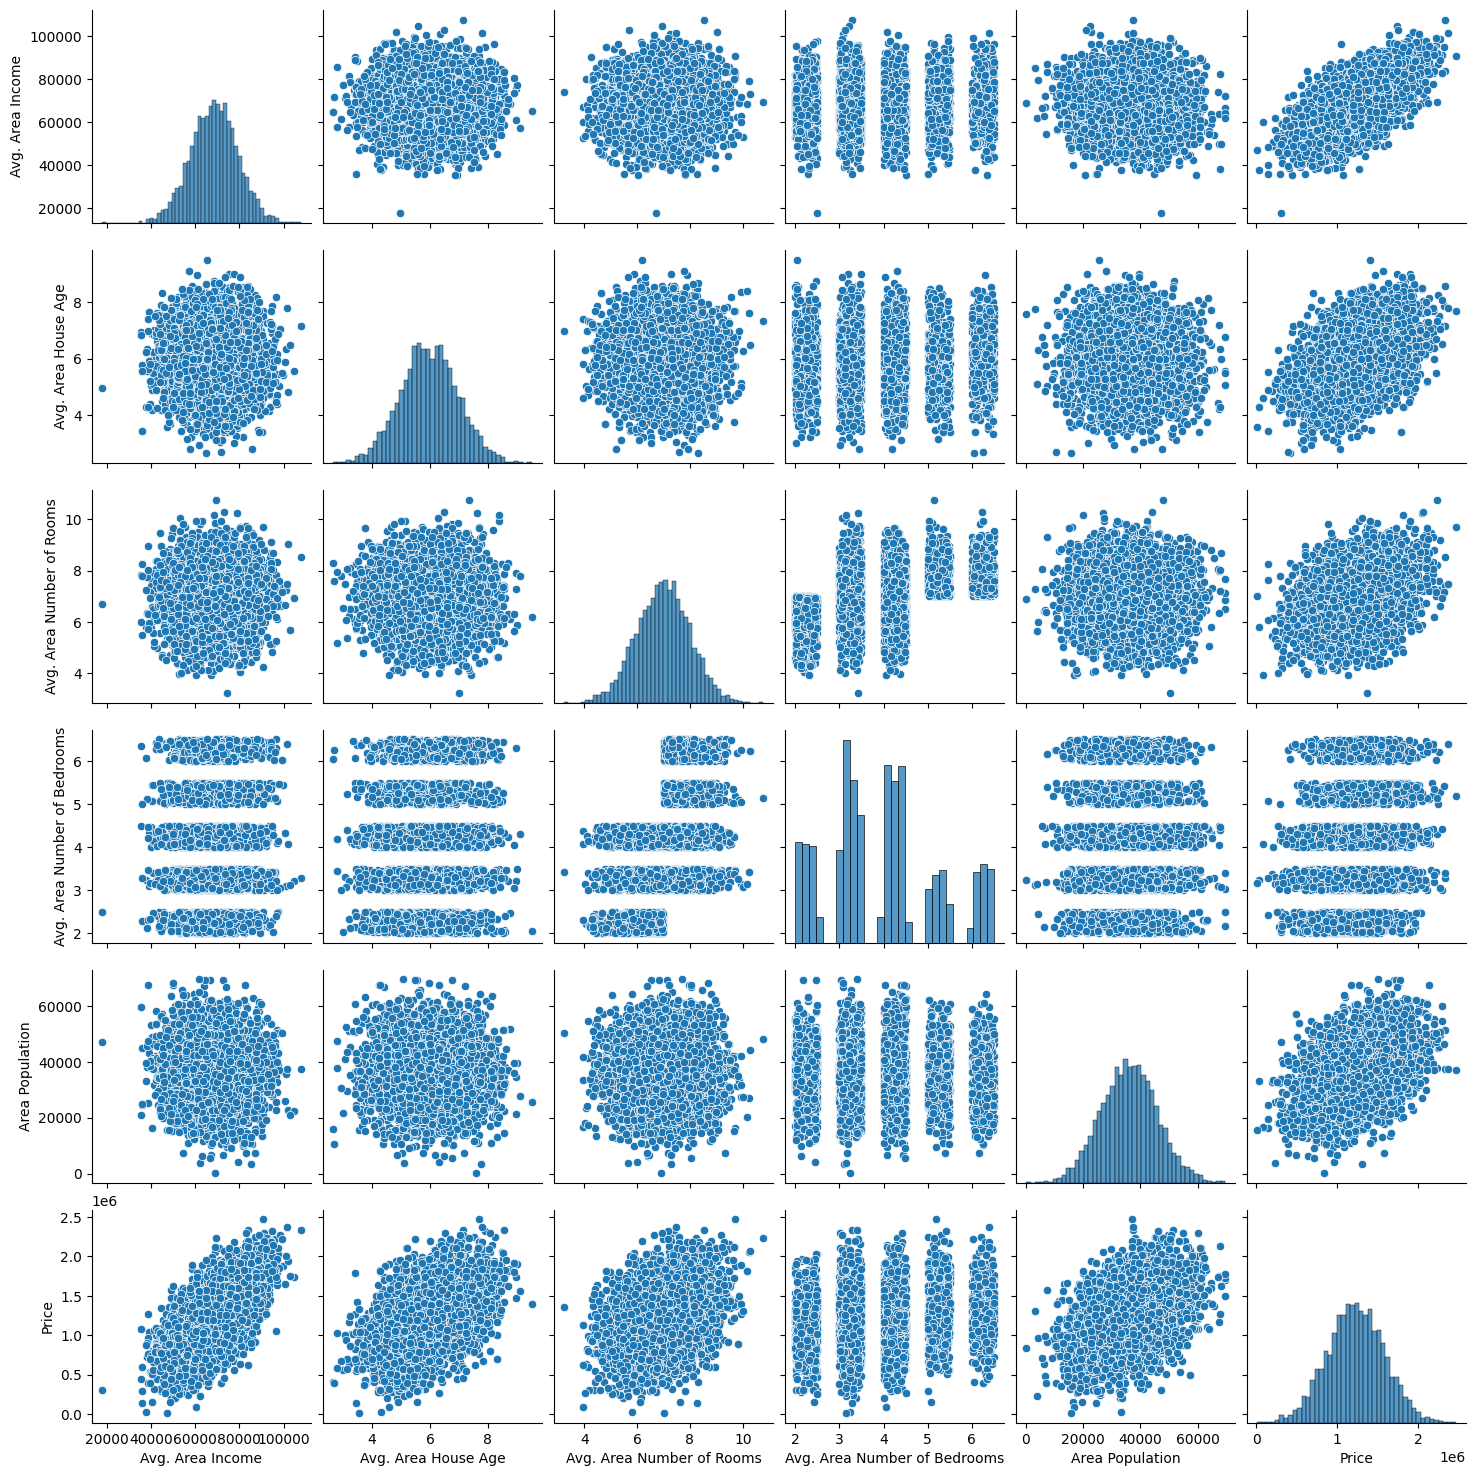

In [9]:


# EDA: Pairplot of features
sns.pairplot(df)
plt.show()

In [10]:
# Prepare the data by selecting relevant features
X = df.drop(columns=['Price', 'Address'])
y = df['Price']

In [11]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:

# Predict on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)





In [14]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.9192986579075526, 0.914681849875402)

In [15]:
# Calculate performance metrics for both training and test sets
def adjusted_r2(r2, n, k):
    """Calculate the adjusted R²."""
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)


In [16]:
# Training performance
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2(r2_train, len(y_train), X_train.shape[1])




In [17]:
# Test performance
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2(r2_test, len(y_test), X_test.shape[1])


In [18]:
print(f"\nTraining Performance:")
print(f"Mean Absolute Error (MAE): ${mae_train:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_train:.2f}")

print(f"\nTest Performance:")
print(f"Mean Absolute Error (MAE): ${mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_test:.2f}")


Training Performance:
Mean Absolute Error (MAE): $81480.50
Root Mean Squared Error (RMSE): $101425.06
R-squared (R²): 0.92
Adjusted R-squared (Adj. R²): 0.92

Test Performance:
Mean Absolute Error (MAE): $81135.57
Root Mean Squared Error (RMSE): $100341.53
R-squared (R²): 0.91
Adjusted R-squared (Adj. R²): 0.91


In [19]:

# Compare training and test performance
print("\nPerformance Comparison:")
print(f"Training vs Test MAE: ${mae_train:.2f} vs ${mae_test:.2f}")
print(f"Training vs Test RMSE: ${rmse_train:.2f} vs ${rmse_test:.2f}")
print(f"Training vs Test R²: {r2_train:.2f} vs {r2_test:.2f}")
print(f"Training vs Test Adj. R²: {adj_r2_train:.2f} vs {adj_r2_test:.2f}")



Performance Comparison:
Training vs Test MAE: $81480.50 vs $81135.57
Training vs Test RMSE: $101425.06 vs $100341.53
Training vs Test R²: 0.92 vs 0.91
Training vs Test Adj. R²: 0.92 vs 0.91



### Observations:
- 1. The R² value of 0.91 indicates that the model explains 91% of the variance in house prices, which suggests a good fit.
- 2. The RMSE of approximately $100,341.53 suggests that the model's predictions have an average error of this amount.
- 3. The heatmap shows strong correlations between the target variable (Price) and features like Avg. Area Income and Avg. Area Number of Rooms.
- 4. No missing values were detected in the dataset, which means the data is complete and ready for modeling.
- 5. Further model improvement could be considered by exploring polynomial regression, feature engineering, or regularization techniques.


### Training Performance:
- **Mean Absolute Error (MAE):** $81,480.50
  - **Interpretation:** On average, the model's predictions are off by approximately $81,480.50 from the actual values. This is a measure of the average absolute error in the model's predictions.
  
- **Root Mean Squared Error (RMSE):** $101,425.06
  - **Interpretation:** The RMSE is higher than the MAE, which suggests that there are larger errors in some predictions. RMSE gives more weight to larger errors due to squaring, so it’s useful for understanding the magnitude of the larger errors.

- **R-squared (R²):** 0.92
  - **Interpretation:** The model explains 92% of the variance in the target variable. This is a high R² value, indicating a strong fit of the model to the training data.

- **Adjusted R-squared (Adj. R²):** 0.92
  - **Interpretation:** Adjusted R² accounts for the number of predictors in the model and provides a more accurate measure of goodness-of-fit. The high value suggests that the model is well-specified and the number of predictors is appropriate.

### Test Performance:
- **Mean Absolute Error (MAE):** $81,135.57
  - **Interpretation:** On average, the model's predictions on the test set are off by about $81,135.57. This is very close to the training MAE, indicating similar performance on unseen data.

- **Root Mean Squared Error (RMSE):** $100,341.53
  - **Interpretation:** The RMSE is slightly lower on the test set compared to the training set. This suggests that the model's performance is slightly better on the test data compared to the training data.

- **R-squared (R²):** 0.91
  - **Interpretation:** The model explains 91% of the variance in the test data, which is slightly lower than on the training data but still high. This indicates that the model generalizes well to new, unseen data.

- **Adjusted R-squared (Adj. R²):** 0.91
  - **Interpretation:** The adjusted R² for the test set is also high, showing that the model is well-tuned and not overfitting. The slight decrease from the training adjusted R² is expected and indicates a good balance between bias and variance.

### Overall Interpretation:
1. **Good Model Fit:** The high R² and adjusted R² values for both training and test sets suggest that the model fits the data well and generalizes effectively to new data.
2. **Error Metrics:** Both MAE and RMSE are fairly consistent between training and test sets, indicating that the model performs similarly on both datasets. The slightly higher error metrics in the training set compared to the test set might be due to overfitting or simply variability in the data.
3. **No Major Signs of Overfitting:** Since the test performance metrics are close to the training metrics, there are no major signs of overfitting. The model's ability to predict on unseen data is strong, as evidenced by the similar performance metrics.


#Polynomial Regression

# 🔹 Step 1: Choose the polynomial degree


In [20]:
degree = 2
poly = PolynomialFeatures(degree=degree)  # This transforms input features into polynomial features


# 🔹 Step 2: Transform training and test data


In [21]:

X_train_poly = poly.fit_transform(X_train)  # Fit and transform training data
X_test_poly = poly.transform(X_test)        # Only transform test data (NO fitting here!)


#Understanding number of features based on degree\

#Degree = 2

In [43]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [44]:

testpoly = PolynomialFeatures(2)
testpoly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

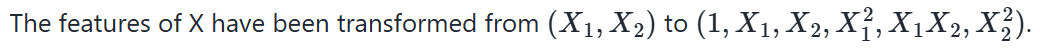

#Degree = 3

In [23]:
X = np.arange(9).reshape(3, 3)
X
testpoly = PolynomialFeatures(degree=3, interaction_only=True)
testpoly.fit_transform(X)

array([[  1.,   0.,   1.,   2.,   0.,   0.,   2.,   0.],
       [  1.,   3.,   4.,   5.,  12.,  15.,  20.,  60.],
       [  1.,   6.,   7.,   8.,  42.,  48.,  56., 336.]])

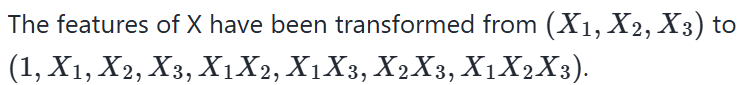

# Degree VS Features Formula

In [24]:
from math import comb

# Compute the number of generated features
num_original_features = 5  # Number of original features
deg = 2
num_poly_features = comb(num_original_features + degree, degree)  # Formula for polynomial features

print(f"🔹 Degree {deg}: Expands {num_original_features} features into {num_poly_features} polynomial features")


🔹 Degree 2: Expands 5 features into 21 polynomial features


# 🔹 Step 3: Check transformed features


In [25]:
X_train_poly  # This shows the new feature set after transformation


array([[1.00000000e+00, 5.52453373e+04, 3.96574483e+00, ...,
        1.91844000e+01, 1.90783792e+05, 1.89729444e+09],
       [1.00000000e+00, 6.23056384e+04, 6.49076933e+00, ...,
        1.01761000e+01, 1.50142510e+05, 2.21526648e+09],
       [1.00000000e+00, 7.73454724e+04, 5.40751463e+00, ...,
        9.67210000e+00, 8.30584933e+04, 7.13259097e+08],
       ...,
       [1.00000000e+00, 6.61953377e+04, 6.50797136e+00, ...,
        9.85960000e+00, 1.17087220e+05, 1.39046382e+09],
       [1.00000000e+00, 5.86945150e+04, 7.39476811e+00, ...,
        1.86624000e+01, 2.15831422e+05, 2.49609925e+09],
       [1.00000000e+00, 6.11625803e+04, 5.89631585e+00, ...,
        3.64816000e+01, 2.17643557e+05, 1.29842764e+09]])

In [26]:
X_train_poly.shape

(3500, 21)

In [27]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

#Lets cross check the transformed features

In [28]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Select only numerical features (exclude 'Price' and 'Address')
input_features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
                  'Avg. Area Number of Bedrooms', 'Area Population']  # ✅ Only numeric features

# Create polynomial features
degree = 2
poly = PolynomialFeatures(degree=degree)

# Transform training data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)  # ✅ Only transform test data (NO fitting here!)

# Get feature names correctly
feature_names = poly.get_feature_names_out(input_features=input_features)

# Convert transformed data into a DataFrame
X_train_poly_df = pd.DataFrame(X_train_poly, columns=feature_names)

# Display first few rows
X_train_poly_df.head()



,1,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Avg. Area Income^2,Avg. Area Income Avg. Area House Age,Avg. Area Income Avg. Area Number of Rooms,Avg. Area Income Avg. Area Number of Bedrooms,...,Avg. Area House Age^2,Avg. Area House Age Avg. Area Number of Rooms,Avg. Area House Age Avg. Area Number of Bedrooms,Avg. Area House Age Area Population,Avg. Area Number of Rooms^2,Avg. Area Number of Rooms Avg. Area Number of Bedrooms,Avg. Area Number of Rooms Area Population,Avg. Area Number of Bedrooms^2,Avg. Area Number of Bedrooms Area Population,Area Population^2
0,1.0,55245.337288,3.965745,8.961106,4.38,43557.943435,3.052047e+09,219088.910746,495059.296160,241974.577321,...,15.727132,35.537458,17.369962,172739.688995,80.301412,39.249642,390327.326753,19.1844,190783.792246,1.897294e+09
1,1.0,62305.638407,6.490769,7.647362,3.19,47066.617420,3.881993e+09,404411.526957,476473.790640,198754.986519,...,42.130087,49.637265,20.705554,305498.556889,58.482150,24.395086,359935.475953,10.1761,150142.509570,2.215266e+09
2,1.0,77345.472379,5.407515,8.243178,3.11,26706.911029,5.982322e+09,418246.773342,637572.533182,240544.419097,...,29.241214,44.575108,16.817370,144418.012073,67.949991,25.636285,220149.834173,9.6721,83058.493300,7.132591e+08
3,1.0,65846.171039,6.385374,6.804131,3.18,28214.363551,4.335718e+09,420452.405295,448025.967243,209390.823903,...,40.772997,43.446918,20.305488,180159.253483,46.296197,21.637136,191974.222963,10.1124,89721.676093,7.960503e+08
4,1.0,69350.793357,6.910415,8.288048,4.29,36779.058567,4.809533e+09,479242.759288,574782.736919,297514.903503,...,47.753835,57.273854,29.645680,254158.556212,68.691747,35.555728,304826.620161,18.4041,157782.161254,1.352699e+09


In [29]:
X_train_poly_df.columns

Index(['1', 'Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population', 'Avg. Area Income^2',
       'Avg. Area Income Avg. Area House Age',
       'Avg. Area Income Avg. Area Number of Rooms',
       'Avg. Area Income Avg. Area Number of Bedrooms',
       'Avg. Area Income Area Population', 'Avg. Area House Age^2',
       'Avg. Area House Age Avg. Area Number of Rooms',
       'Avg. Area House Age Avg. Area Number of Bedrooms',
       'Avg. Area House Age Area Population', 'Avg. Area Number of Rooms^2',
       'Avg. Area Number of Rooms Avg. Area Number of Bedrooms',
       'Avg. Area Number of Rooms Area Population',
       'Avg. Area Number of Bedrooms^2',
       'Avg. Area Number of Bedrooms Area Population', 'Area Population^2'],
      dtype='object')

In [30]:
X_train_poly_df.shape

(3500, 21)

# 🔹 Step 4: Train a Linear Regression model on polynomial features


In [31]:

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)  # Model learns the best polynomial coefficients


LinearRegression()

# 🔹 Step 5: Make predictions


In [32]:

y_train_pred = poly_model.predict(X_train_poly)  # Predictions on training data
y_test_pred = poly_model.predict(X_test_poly)    # Predictions on test data


# 🔹 Step 6: Store test predictions for evaluation


In [33]:


y_test_pred_poly = y_test_pred


In [34]:

# 🔹 Function to Calculate Adjusted R²
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

In [35]:

# 🔹 Training Performance Metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2(r2_train, X_train.shape[0], X_train_poly.shape[1] - 1)


In [36]:

# 🔹 Testing Performance Metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2(r2_test, X_test.shape[0], X_test_poly.shape[1] - 1)



🔹 Training Performance:
Mean Absolute Error (MAE): $81363.06
Root Mean Squared Error (RMSE): $101323.68
R-squared (R²): 0.92
Adjusted R-squared (Adj. R²): 0.92

🔹 Test Performance:
Mean Absolute Error (MAE): $81174.52
Root Mean Squared Error (RMSE): $100409.08
R-squared (R²): 0.91
Adjusted R-squared (Adj. R²): 0.91


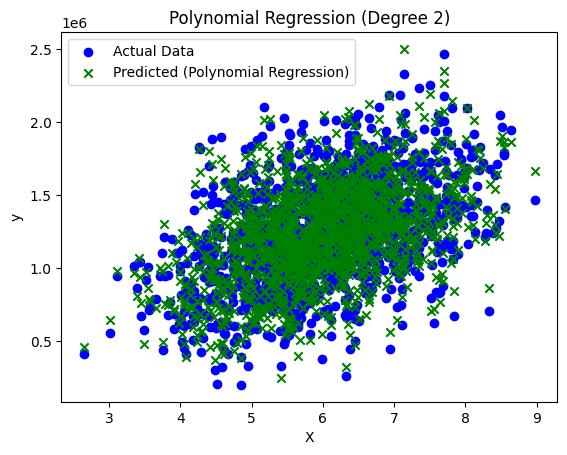

In [37]:

# 🔹 Print Performance Metrics
print(f"\n🔹 Training Performance:")
print(f"Mean Absolute Error (MAE): ${mae_train:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_train:.2f}")

print(f"\n🔹 Test Performance:")
print(f"Mean Absolute Error (MAE): ${mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_test:.2f}")

# 🔹 Visualizing Polynomial Regression Fit
plt.scatter(X_test.iloc[:,1], y_test, color='blue', label='Actual Data')
plt.scatter(X_test.iloc[:,1], y_test_pred.flatten(), color='green', marker='x', label='Predicted (Polynomial Regression)')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title(f"Polynomial Regression (Degree {degree})")
plt.show()

In [38]:
X_test.shape

(1500, 5)

In [39]:
X_test.iloc[:,1]

,Avg. Area House Age
1501,7.017838
2586,6.893260
2653,6.745054
1055,6.300409
705,3.412866
...,...
3563,6.259782
1538,5.612677
1837,6.729105
2380,6.576733


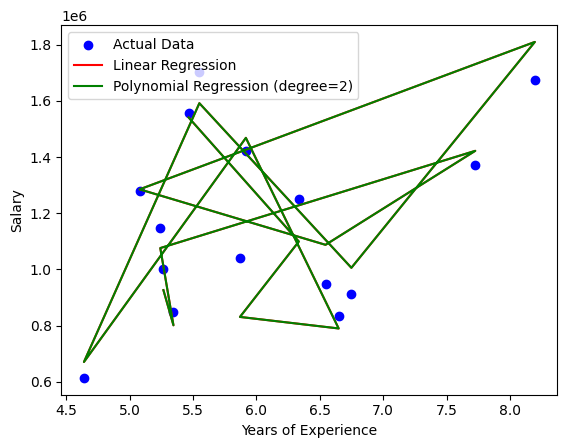

In [40]:
# Plot Results
plt.scatter(X_test.iloc[5:20,1], y_test[5:20], color="blue", label="Actual Data")
plt.plot(X_test.iloc[5:20,1], y_test_pred[5:20], color="red", label="Linear Regression")
plt.plot(X_test.iloc[5:20,1], y_test_pred_poly.flatten()[5:20], color="green", label="Polynomial Regression (degree=2)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

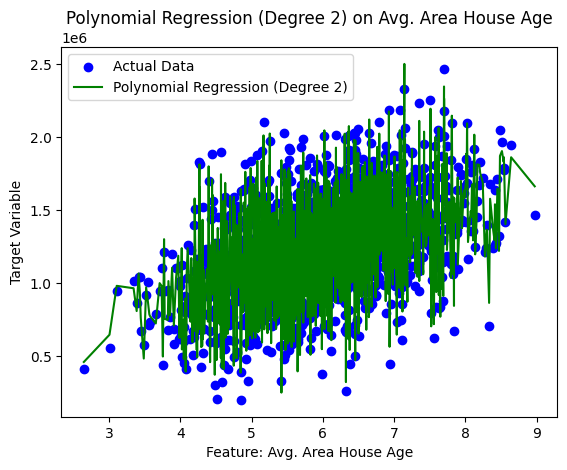

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Select a single feature for visualization
feature_index = 1  # Change this index to visualize a different feature

# Sort X_test by the selected feature for smooth plotting
sorted_indices = np.argsort(X_test.iloc[:, feature_index])  # Sorting indices
X_sorted = X_test.iloc[sorted_indices, feature_index]  # Sorted feature values
y_test_sorted = y_test.iloc[sorted_indices]  # Sorted actual target values
y_test_pred_sorted = y_test_pred[sorted_indices]  # Sorted predicted values

# 🔹 Scatter plot for actual data
plt.scatter(X_sorted, y_test_sorted, color='blue', label='Actual Data')

# 🔹 Line plot for predicted polynomial regression values
plt.plot(X_sorted, y_test_pred_sorted, color='green', label=f'Polynomial Regression (Degree {degree})')

plt.xlabel("Feature: " + X_test.columns[feature_index])
plt.ylabel("Target Variable")
plt.legend()
plt.title(f"Polynomial Regression (Degree {degree}) on {X_test.columns[feature_index]}")
plt.show()


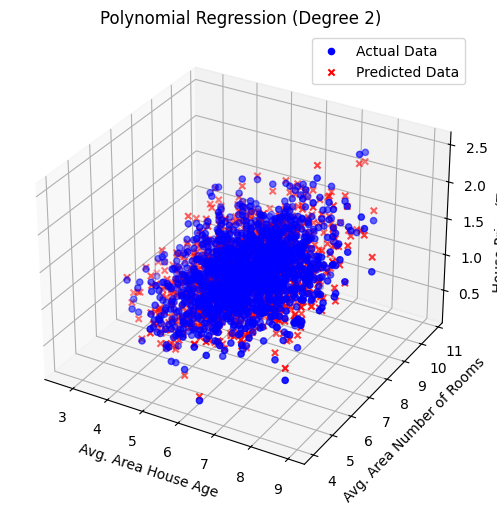

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Select two features for 3D visualization
x_feature = X_test.iloc[:, 1]  # Example: "Avg. Area Number of Rooms"
y_feature = X_test.iloc[:, 2]  # Example: "Avg. Area Income"
z_actual = y_test
z_pred = y_test_pred.flatten()

# Scatter plot for actual data
ax.scatter(x_feature, y_feature, z_actual, color='blue', label='Actual Data')

# Scatter plot for predicted data
ax.scatter(x_feature, y_feature, z_pred, color='red', marker='x', label='Predicted Data')

ax.set_xlabel(X_test.columns[1])
ax.set_ylabel(X_test.columns[2])
ax.set_zlabel("House Price (Target)")
ax.legend()
ax.set_title("Polynomial Regression (Degree {})".format(degree))

plt.show()
